In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [2]:
#membaca dataset dan ubah ke data frame
data = pd.read_csv('Salary_Data.csv')

In [4]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
#memisahkan atribut dan label
x = data['YearsExperience']
y = data['Salary']

#mengubah bentuk atribut karena cuma ada 1 atribut
import numpy as np

x = x[:,np.newaxis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

#membangun model dengan parameter C, gamma dan kernel
model=SVR()

#parameter masukan ke dalam dictionary
parameter = {
    'kernel' : ['rbf'],
    'C' : [1000, 10000, 100000],
    'gamma' : [0.5, 0.05, 0.005]
}

#buat fungsi grid search 
grid_search = GridSearchCV(model, parameter)

#train model
grid_search.fit(x, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1000, 10000, 100000],
                         'gamma': [0.5, 0.05, 0.005], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [9]:
#menampilkan parameter terbaik
print(grid_search.best_params_)

{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}


In [10]:
#membuat model dengan parameter terbaik
model_baru = SVR(C=100000, gamma=0.005, kernel='rbf')
model_baru.fit(x, y)

SVR(C=100000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.005,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

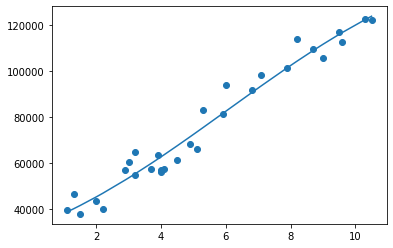

In [11]:
#visualisasi model
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.plot(x, model_baru.predict(x))